In [ ]:
!pip install transformers
!pip install timm
!pip install torchview

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
# import torch.utils.data.dataloader as dataloader
from torch.utils.data import Dataset, DataLoader, Subset
import math
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pickle
from torchview import draw_graph
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
#img_eq = exposure.equalize_hist(img)

In [ ]:
# path = '/content/drive/MyDrive/Topics in Control/Data'
# li = os.listdir(path)

target_v= {'People': 0,
         'Drones': 1,
         'Cars': 2}

In [ ]:
target = []
images = []
file_n = []
file_check = {}
data_ver = {}
for cl in li:
  print(f'------------{cl} START------------')

  for data in os.listdir(rf'{path}/{cl}'):

    for img in os.listdir(rf'{path}/{cl}/{data}'):

      image = pd.read_csv(rf'{path}/{cl}/{data}/{img}').to_numpy().astype(np.uint8) / 255

      images.append(image)
      target.append(classes[cl])
      file_n.append(data)

  print(f'------------{cl} END------------')

------------People START------------
------------People END------------
------------Cars START------------
------------Cars END------------
------------Drones START------------
------------Drones END------------
------------.ipynb_checkpoints START------------
------------.ipynb_checkpoints END------------


In [ ]:
file_check['target'] = target
file_check['folder_name'] = file_n

data_ver['images'] = images
data_ver['class'] = target

In [ ]:
data = pd.DataFrame(data_ver)

In [ ]:
data = pd.DataFrame(pd.read_pickle(r'/content/drive/MyDrive/Topics in Control/RADAR_dataset.pkl'))

In [ ]:
data['class'].value_counts()

,count
class,
0,6710
2,5720
1,5065


In [ ]:

# Save the dataset to a pickle file
with open('RADAR_dataset.pkl', 'wb') as f:
    pickle.dump(data_ver, f)

print("Dataset saved successfully!")

Dataset saved successfully!


In [ ]:
# file_check_df = pd.DataFrame(file_check)


In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Resize((64,64)),
                                transforms.ToTensor()])

Densenet

In [ ]:

data = shuffle(data, random_state=42).reset_index(drop=True)

In [ ]:
data.head(10)

,images,class
0,"[[0.5686274509803921, 0.5568627450980392, 0.57...",0
1,"[[0.5647058823529412, 0.592156862745098, 0.588...",0
2,"[[0.5568627450980392, 0.5490196078431373, 0.56...",0
3,"[[0.5529411764705883, 0.5803921568627451, 0.58...",2
4,"[[0.5803921568627451, 0.5843137254901961, 0.57...",0
5,"[[0.5686274509803921, 0.5882352941176471, 0.57...",1
6,"[[0.5843137254901961, 0.5764705882352941, 0.57...",2
7,"[[0.5529411764705883, 0.5803921568627451, 0.57...",2
8,"[[0.5647058823529412, 0.5333333333333333, 0.55...",0
9,"[[0.596078431372549, 0.5647058823529412, 0.564...",0


In [ ]:
# data['class'] = data['class'] - 1

##Densenet

In [ ]:
class DensnetDataloader(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]
        image = row["images"]  # Grayscale Image
        label = row["class"]  # Class Label

        # Converting to PyTorch tensor
        image = torch.tensor(image, dtype=torch.float32).unsqueeze(0)  # Adding channel dim (1, H, W)
        label = torch.tensor(label, dtype=torch.long)

        if self.transform:
            image = self.transform(image)

        return image, label

In [ ]:
class Bneck(nn.Module):
  def __init__(self, in_channels, growth_rate):
    super(Bneck, self).__init__()

    # 1x1
    self.bnorm1 = nn.BatchNorm2d(in_channels)
    self.conv1 = nn.Conv2d(in_channels, 4*growth_rate, kernel_size=1)

    # 3x3
    self.bnorm2 = nn.BatchNorm2d(4*growth_rate)
    self.conv2 = nn.Conv2d(4*growth_rate, growth_rate, kernel_size=3, padding=1)

  def forward(self, x):
    out = self.conv1(F.relu(self.bnorm1(x)))
    out = self.conv2(F.relu(self.bnorm2(out)))

    out = torch.cat((x, out), 1)
    return out

class DenseBlock(nn.Module):
  def __init__(self, num_layers, in_channels, growth_rate):
    super(DenseBlock, self).__init__()
    layers = []
    for i in range(num_layers):
      layers.append(Bneck(in_channels + i*growth_rate, growth_rate))

    self.dense_layers = nn.Sequential(*layers)

  def forward(self, x):
    return self.dense_layers(x)

class Transition(nn.Module):
  def __init__(self, in_channels, out_channels):
    super(Transition, self).__init__()

    self.bnorm = nn.BatchNorm2d(in_channels) # 56 x 56 x 392
    self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1) # 56 x 56 x 196
    self.pool = nn.AdaptiveAvgPool2d((1, None))  # 28 x 28 x 196

  def forward(self, x):
    out = self.conv(F.relu(self.bnorm(x)))
    out = self.pool(out)
    return out


In [ ]:
class DenseNet(nn.Module):
  def __init__(self, num_block:list, growth_rate:int=32, classes=3,transform=None):
    super(DenseNet, self).__init__()

    self.growth_rate = growth_rate
    self.conv1 = nn.Conv2d(1, 2*growth_rate, kernel_size=7, stride=2, padding=3)
    self.bnorm1 = nn.BatchNorm2d(2*growth_rate)
    self.pool1 = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

    # Dense Block 1
    num_channels = 2 * growth_rate
    self.dense_block1 = DenseBlock(num_block[0], num_channels, growth_rate)
    num_channels += num_block[0] * growth_rate
    # Trasition Layer 1
    self.trans1 = Transition(num_channels, num_channels // 2)
    num_channels = num_channels // 2

    # Dense Block 2
    self.dense_block2 = DenseBlock(num_block[1], num_channels, growth_rate)
    num_channels += num_block[1] * growth_rate
    # Transition Layer 2
    self.trans2 = Transition(num_channels, num_channels // 2)
    num_channels = num_channels // 2

    # Dense Block 3
    self.dense_block3 = DenseBlock(num_block[2], num_channels, growth_rate)
    num_channels += num_block[2] * growth_rate
    # Transition Layer 3
    self.trans3 = Transition(num_channels, num_channels // 2)
    num_channels = num_channels // 2

    # Dense Block 4
    self.dense_block4 = DenseBlock(num_block[3], num_channels, growth_rate)
    num_channels += num_block[3] * growth_rate

    self.bnorm2 = nn.BatchNorm2d(num_channels)
    self.pool2 = nn.AvgPool2d(8)
    self.fc = nn.Linear(num_channels, classes)

  def forward(self, x):
    x = self.pool1(F.relu(self.bnorm1(self.conv1(x))))

    x = self.dense_block1(x)
    x = self.trans1(x)

    x = self.dense_block2(x)
    x = self.trans2(x)

    x = self.dense_block3(x)
    x = self.trans3(x)

    x = self.dense_block4(x)
    x = F.relu(self.bnorm2(x))

    x = F.adaptive_avg_pool2d(x, (1,1))
    x = torch.flatten(x, 1)
    x = self.fc(x)

    return x

In [ ]:
num_block = [6,12,24,16]
growth_rate = 32
classes = 3
Densenet_model = DenseNet(num_block, growth_rate, classes, transform)

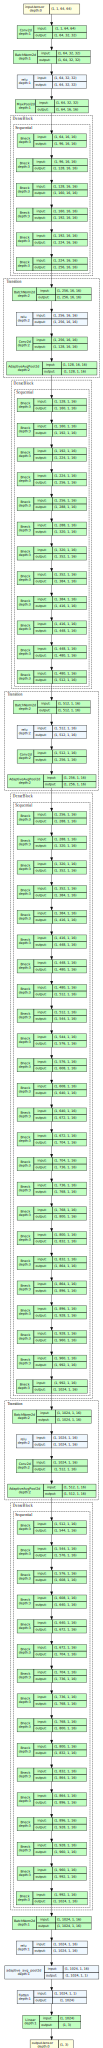

In [ ]:
draw_graph(Densenet_model, input_size=(1,1,64,64),expand_nested=True).visual_graph

In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(data, test_size=0.2, random_state=42, shuffle=True, stratify=data["class"])

# Test-Val Split (30-10)
test_df, val_df = train_test_split(test_df, test_size=0.8, random_state=42, shuffle=True, stratify=test_df["class"])

In [ ]:
print(train_df.size)
print(val_df.size)
print(test_df.size)

27992
5600
1398


In [ ]:

train_dataset = DensnetDataloader(train_df)
test_dataset = DensnetDataloader(test_df)
val_dataset = DensnetDataloader(val_df)

BATCH_SIZE =  30
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)


model = DenseNet(num_block=[6, 12, 24, 16], growth_rate=32, classes=3)  # Adjust classes
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.CrossEntropyLoss()
LEARNING_RATE =  1e-4
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

# Training Loop
NUM_EPOCHS = 20
K_FOLDS = 5

train_acc_history = []
test_acc_history = []
fold_train_acc = []
fold_valid_acc = []
fold_test_acc = []

kf = KFold(n_splits=K_FOLDS, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(kf.split(train_dataset)):
    print(f"\n--- Fold {fold+1}/{K_FOLDS} ---")

    # Create Train & Validation subsets for this fold
    train_subset = Subset(train_dataset, train_idx)
    val_subset = Subset(train_dataset, val_idx)

    # Create DataLoaders
    train_loader = DataLoader(train_subset, batch_size=BATCH_SIZE, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=BATCH_SIZE, shuffle=False)

    # Initialize Model for this Fold
    model = DenseNet(num_block=[6, 12, 24, 16], growth_rate=32, classes=3, transform=transform)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # Loss and Optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

    # Track Accuracy for this Fold
    train_acc_history = []
    val_acc_history = []

    # Training Loop
    for epoch in range(NUM_EPOCHS):
        model.train()
        correct_train = 0
        total_train = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # Compute train accuracy
            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        train_acc = 100 * correct_train / total_train
        train_acc_history.append(train_acc)

        # Validation Loop
        model.eval()
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)

                _, predicted = torch.max(outputs, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        val_acc = 100 * correct_val / total_val
        val_acc_history.append(val_acc)

        print(f"Epoch [{epoch+1}/{NUM_EPOCHS}] - Train Acc: {train_acc:.2f}% | Val Acc: {val_acc:.2f}%")

    # Storing Fold Accuracy Results
    fold_train_acc.append(train_acc_history)
    fold_valid_acc.append(val_acc_history)


--- Fold 1/5 ---
Epoch [1/20] - Train Acc: 87.53% | Val Acc: 91.96%
Epoch [2/20] - Train Acc: 91.86% | Val Acc: 93.04%
Epoch [3/20] - Train Acc: 93.35% | Val Acc: 93.07%
Epoch [4/20] - Train Acc: 93.99% | Val Acc: 94.14%
Epoch [5/20] - Train Acc: 94.94% | Val Acc: 94.32%
Epoch [6/20] - Train Acc: 94.89% | Val Acc: 94.96%
Epoch [7/20] - Train Acc: 95.35% | Val Acc: 94.57%
Epoch [8/20] - Train Acc: 95.78% | Val Acc: 94.21%
Epoch [9/20] - Train Acc: 95.72% | Val Acc: 94.54%
Epoch [10/20] - Train Acc: 96.07% | Val Acc: 94.96%
Epoch [11/20] - Train Acc: 96.41% | Val Acc: 94.04%
Epoch [12/20] - Train Acc: 96.68% | Val Acc: 95.29%
Epoch [13/20] - Train Acc: 96.92% | Val Acc: 95.18%
Epoch [14/20] - Train Acc: 96.70% | Val Acc: 94.25%
Epoch [15/20] - Train Acc: 97.50% | Val Acc: 94.46%
Epoch [16/20] - Train Acc: 97.68% | Val Acc: 95.21%
Epoch [17/20] - Train Acc: 97.80% | Val Acc: 95.04%
Epoch [18/20] - Train Acc: 98.39% | Val Acc: 93.96%
Epoch [19/20] - Train Acc: 97.95% | Val Acc: 96.00%
Epo

In [ ]:
torch.save(model.state_dict(), r"/content/drive/MyDrive/Topics in Control/folds_model_densenet.pt")

In [ ]:
for i in range(len(fold_train_acc)):
  print(i)

0
1
2
3
4


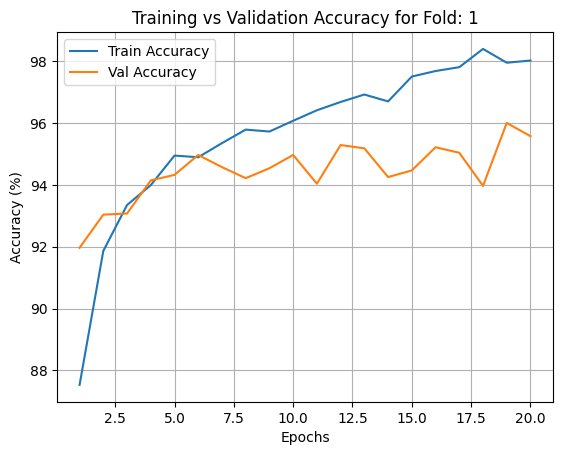

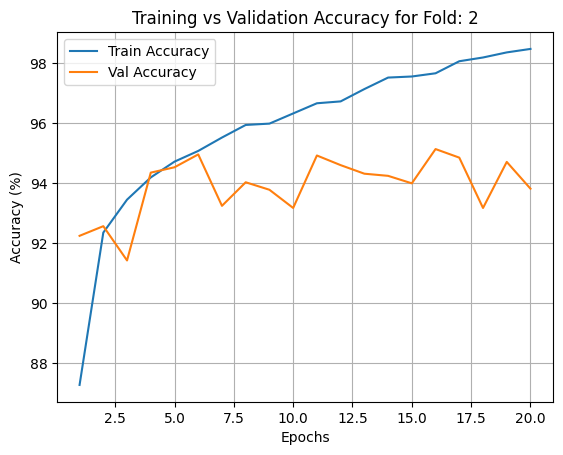

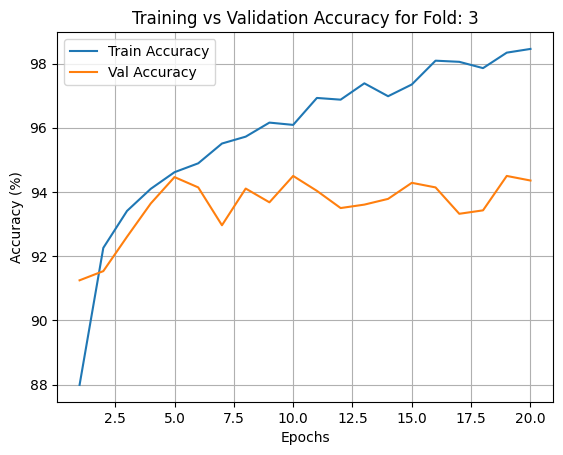

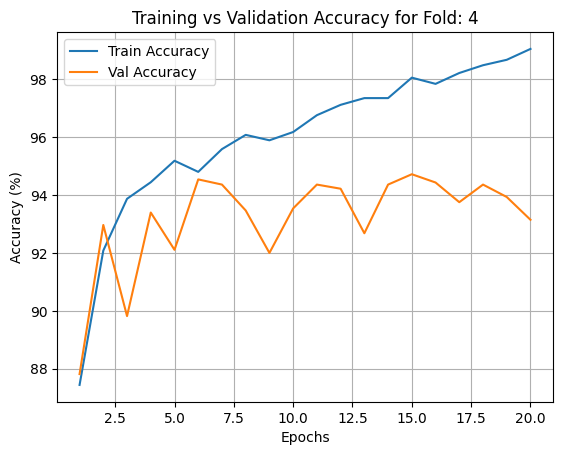

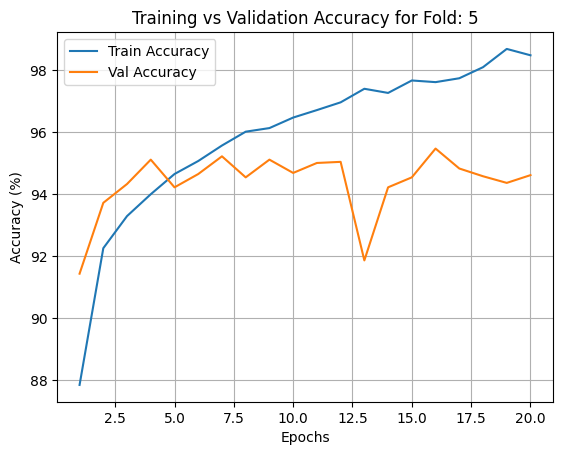

In [ ]:
for i in range(len(fold_train_acc)):
  # plt.figure(figsize=(8, 5))
  plt.plot(range(1, NUM_EPOCHS + 1), fold_train_acc[i], label="Train Accuracy")
  plt.plot(range(1, NUM_EPOCHS + 1), fold_valid_acc[i], label="Val Accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy (%)")
  plt.title(f"Training vs Validation Accuracy for Fold: {i+1}")
  plt.legend()
  plt.grid()
  plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Evaluating Model on Test Set
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)

        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())



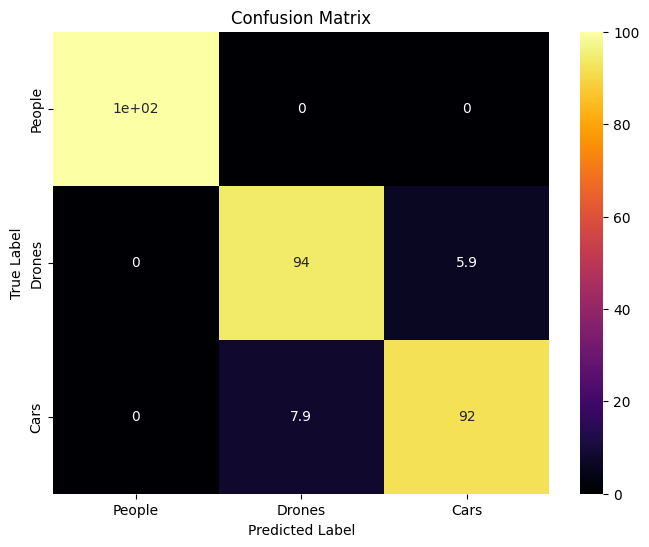

In [ ]:
# Compute Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1, keepdims=True) * 100
np.set_printoptions(suppress=True)
class_names = np.unique(y_true)  # Get class names from labels

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=True, cmap="inferno", xticklabels=target_v.keys(), yticklabels=target_v.keys())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print Classification Report
# print("Classification Report:\n", classification_report(y_true, y_pred)

In [ ]:
torch.save(model.state_dict(), "model.pt")

## Vision tranformer

Image Resolution is 11 x 61 convert it to 64 x 64 and use patch size of 4 x 4, number of features in one patch 4 x 4 x 1 = 16, total patches in the whole image = 64 / 4 x 64 x 4 => 16 x 16 => 196 patches

In [ ]:
def patch_extract(image_t, patch_size=4):
  """ converts image tensor to patches to be given to transformer"""
  bs, c, h, w = image_t.size() # batch size, channel, height, width
  unfold = torch.nn.Unfold(kernel_size=patch_size, stride=patch_size)
  unfolded = unfold(image_t)

  unfolded = unfolded.transpose(1,2).reshape(bs, -1, c * patch_size * patch_size)
  return unfolded

In [ ]:
class TransformerDataset(Dataset):
  def __init__(self, dataframe, transforms=None):
    """
    Args: Datafame of dataset with images and target
    """
    self.dataframe = dataframe
    self.transforms = transforms

  def __len__(self):
    """ Returns number of samples"""
    return len(self.dataframe)

  def __getitem__(self,idx):
    image = self.dataframe.iloc[idx]['images']
    target = self.dataframe.iloc[idx]['class']
    if self.transforms:
      image = self.transforms(image)

    image = image.type(torch.float32)
    return image, target


In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Resize((64,64)),
                                ])

In [ ]:
train_data = TransformerDataset(train_df, transforms=transform)
val_data = TransformerDataset(val_df, transforms=transform)
test_data = TransformerDataset(test_df, transforms=transform)
BATCH_SIZE = 50

In [ ]:
train_loader = DataLoader(train_data, shuffle=True, batch_size=BATCH_SIZE)
valid_loader = DataLoader(val_data, batch_size=BATCH_SIZE)
test_loader  = DataLoader(test_data, batch_size=BATCH_SIZE)

In [ ]:
# Creating a dataloader itterable object
dataiter = next(iter((test_loader)))
# Sampling from the itterable object
test_images, test_labels = dataiter

Sequence Length 256
tensor([1, 2, 0, 2, 2, 2, 0, 0, 1, 1, 0, 1, 0, 1, 2, 0, 1, 2, 0, 0, 2, 2, 1, 1,
        0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 2, 2, 2, 1, 0,
        1, 0])


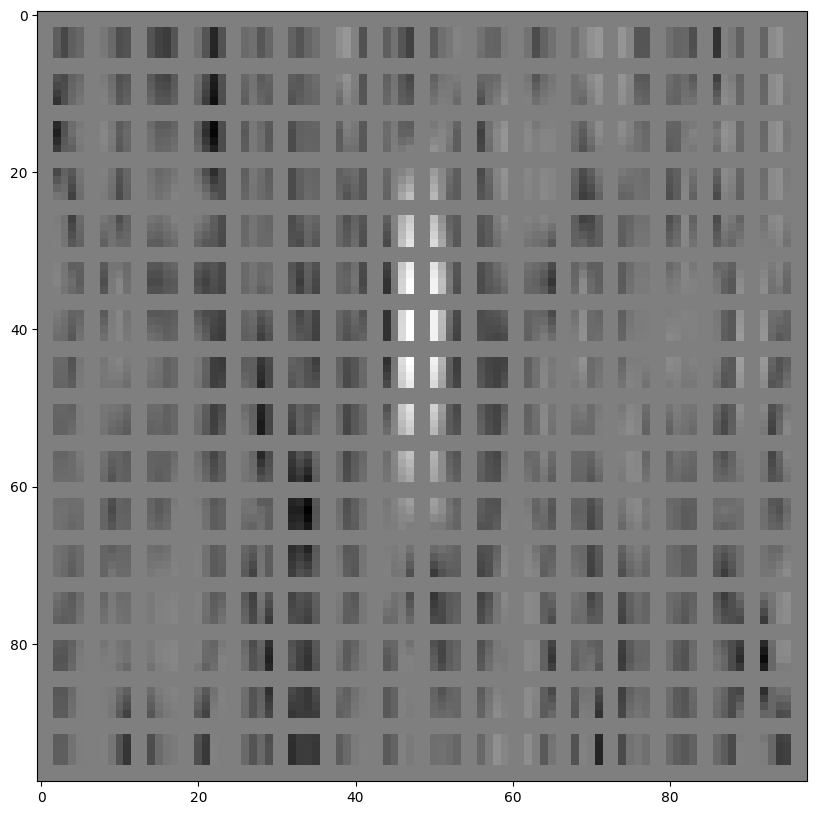

In [ ]:
patch_size = 4
patches = patch_extract(test_images, patch_size=patch_size)

patches_square = patches.reshape(test_images.shape[0], -1, 1, patch_size, patch_size)


grid_size = test_images.shape[2] // patch_size
print("Sequence Length %d" % (grid_size**2))


plt.figure(figsize=(10,10))
out = torchvision.utils.make_grid(patches_square[0], grid_size, normalize=True, pad_value=0.5)
_ = plt.imshow(out.numpy().transpose((1, 2, 0)))


In [ ]:
# Transformer block with self-attention
class TransformerBlock(nn.Module):
    def __init__(self, hidden_size=128, num_heads=4):

        super(TransformerBlock, self).__init__()

        # Layer normalization to normalize the input data
        self.norm1 = nn.LayerNorm(hidden_size)

        # Multi-head attention mechanism
        self.multihead_attn = nn.MultiheadAttention(hidden_size, num_heads=num_heads,
                                                    batch_first=True, dropout=0.1)

        # Another layer normalization
        self.norm2 = nn.LayerNorm(hidden_size)

        # Multi-layer perceptron (MLP) with a hidden layer and activation function
        self.mlp = nn.Sequential(
            nn.Linear(hidden_size, hidden_size * 2),
            nn.LayerNorm(hidden_size * 2),
            nn.ELU(),
            nn.Linear(hidden_size * 2, hidden_size)
        )

    def forward(self, x):
        # Applying the first layer normalization
        norm_x = self.norm1(x)

        # Applying multi-head attention and add the input (residual connection)
        x = self.multihead_attn(norm_x, norm_x, norm_x)[0] + x

        # Applying the second layer normalization
        norm_x = self.norm2(x)

        # Pass through the MLP and add the input (residual connection)
        x = self.mlp(norm_x) + x

        return x


class ViT(nn.Module):
    def __init__(self, image_size, channels_in, patch_size, hidden_size, num_layers, num_heads=8):
        super(ViT, self).__init__()

        self.patch_size = patch_size

        # Fully connected layer to project input patches to the hidden size dimension
        self.fc_in = nn.Linear(channels_in * patch_size * patch_size, hidden_size)

        # Creating a list of Transformer blocks
        self.blocks = nn.ModuleList([
            TransformerBlock(hidden_size, num_heads) for _ in range(num_layers)
        ])

        # Fully connected output layer to map to the number of classes
        self.fc_out = nn.Linear(hidden_size, 3)

        # Parameter for the output token
        self.out_vec = nn.Parameter(torch.zeros(1, 1, hidden_size))

        # Positional embeddings to retain positional information of patches
        seq_length = (image_size // patch_size) ** 2
        self.pos_embedding = nn.Parameter(torch.empty(1, seq_length, hidden_size).normal_(std=0.001))

    def forward(self, image):
        bs = image.shape[0]

        # Extracting patches from the image and flatten them
        patch_seq = patch_extract(image, patch_size=self.patch_size)

        # Projecting patches to the hidden size dimension
        patch_emb = self.fc_in(patch_seq)

        # Adding positional embeddings to the patch embeddings
        patch_emb = patch_emb + self.pos_embedding

        # Concatenating the output token to the patch embeddings
        embs = torch.cat((self.out_vec.expand(bs, 1, -1), patch_emb), 1)

        # Passing the embeddings through each Transformer block
        for block in self.blocks:
            embs = block(embs)

        # Using the embedding of the output token for classification
        return self.fc_out(embs[:, 0])

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ViT(image_size=test_images.shape[2],
            channels_in=test_images.shape[1],
            patch_size=patch_size,
            hidden_size=128,
            num_layers=8,
            num_heads=8).to(device)

# View the network
# Note that the layer order is simply the order in which we defined them, NOT the order of the forward pass
print(model)

ViT(
  (fc_in): Linear(in_features=16, out_features=128, bias=True)
  (blocks): ModuleList(
    (0-7): 8 x TransformerBlock(
      (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (multihead_attn): MultiheadAttention(
        (out_proj): NonDynamicallyQuantizableLinear(in_features=128, out_features=128, bias=True)
      )
      (norm2): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (mlp): Sequential(
        (0): Linear(in_features=128, out_features=256, bias=True)
        (1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
        (2): ELU(alpha=1.0)
        (3): Linear(in_features=256, out_features=128, bias=True)
      )
    )
  )
  (fc_out): Linear(in_features=128, out_features=3, bias=True)
)


In [ ]:
num_model_params = 0
for param in model.parameters():
    num_model_params += param.flatten().shape[0]

print(f"Number of model parameters: {num_model_params}")

Number of model parameters: 1099395


In [ ]:
batch_size = 50

learning_rate = 1e-4

patch_size = 4

num_epochs = 20

In [ ]:
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Storing accuracy values for plotting
train_accuracies = []
val_accuracies = []
fold_accuracies = []
test_accuracies = []

In [ ]:
for fold, (train_idx, val_idx) in enumerate(kf.split(train_data)):
    print(f"\n--- Fold {fold+1}/{k_folds} ---")

    train_subsampler = torch.utils.data.Subset(train_data, train_idx)
    val_subsampler = torch.utils.data.Subset(train_data, val_idx)

    train_loader = DataLoader(train_subsampler, shuffle=True, batch_size=batch_size)
    val_loader = DataLoader(val_subsampler, batch_size=batch_size)

    model = ViT(image_size=test_images.shape[2],
                channels_in=test_images.shape[1],
                patch_size=patch_size,
                hidden_size=128,
                num_layers=8,
                num_heads=8).to(device)

    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()

    fold_train_accuracies = []
    fold_val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        train_loss, correct, total = 0.0, 0, 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            correct += (outputs.argmax(dim=1) == labels).sum().item()
            total += labels.size(0)

        train_acc = (correct / total) * 100
        fold_train_accuracies.append(train_acc)

        # -------------------------------
        # Validation Loop
        # -------------------------------
        model.eval()
        val_correct, val_total = 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                val_correct += (outputs.argmax(dim=1) == labels).sum().item()
                val_total += labels.size(0)

        val_acc = (val_correct / val_total) * 100
        fold_val_accuracies.append(val_acc)

        print(f"Fold {fold+1}, Epoch {epoch+1}/{num_epochs} - Train Accuracy: {train_acc:.4f}, Validation Accuracy: {val_acc:.4f}")

    # Storing accuracy per fold
    train_accuracies.append(fold_train_accuracies)
    val_accuracies.append(fold_val_accuracies)
    fold_accuracies.append(val_acc)


--- Fold 1/5 ---
Fold 1, Epoch 1/20 - Train Accuracy: 38.1208, Validation Accuracy: 43.1786
Fold 1, Epoch 2/20 - Train Accuracy: 68.8192, Validation Accuracy: 70.0714
Fold 1, Epoch 3/20 - Train Accuracy: 81.5559, Validation Accuracy: 83.9286
Fold 1, Epoch 4/20 - Train Accuracy: 86.5934, Validation Accuracy: 86.6429
Fold 1, Epoch 5/20 - Train Accuracy: 88.5763, Validation Accuracy: 88.5714
Fold 1, Epoch 6/20 - Train Accuracy: 89.6213, Validation Accuracy: 88.6786
Fold 1, Epoch 7/20 - Train Accuracy: 91.2915, Validation Accuracy: 92.0000
Fold 1, Epoch 8/20 - Train Accuracy: 91.6220, Validation Accuracy: 92.3929
Fold 1, Epoch 9/20 - Train Accuracy: 93.0064, Validation Accuracy: 92.7857
Fold 1, Epoch 10/20 - Train Accuracy: 93.1761, Validation Accuracy: 93.2500
Fold 1, Epoch 11/20 - Train Accuracy: 93.2208, Validation Accuracy: 93.7143
Fold 1, Epoch 12/20 - Train Accuracy: 94.0068, Validation Accuracy: 93.1786
Fold 1, Epoch 13/20 - Train Accuracy: 94.1586, Validation Accuracy: 92.8929
Fol

In [ ]:
model.eval()
test_correct, test_total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        test_correct += (outputs.argmax(dim=1) == labels).sum().item()
        test_total += labels.size(0)

test_acc = test_correct / test_total
test_accuracies.append(test_acc)
print(f"\nFinal Test Accuracy: {test_acc:.4f}")


Final Test Accuracy: 0.9442


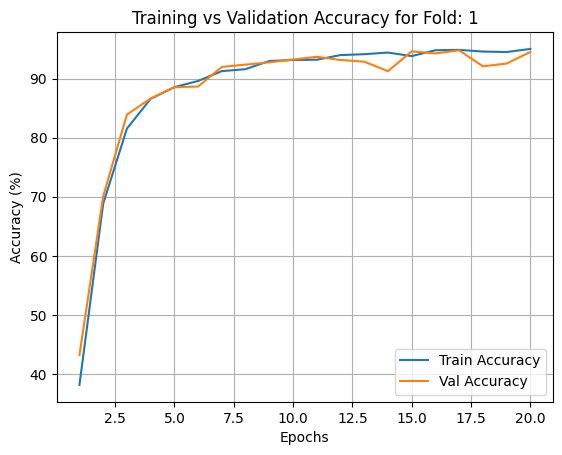

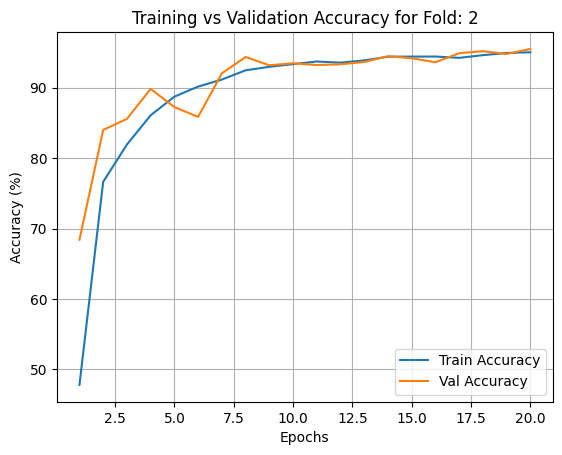

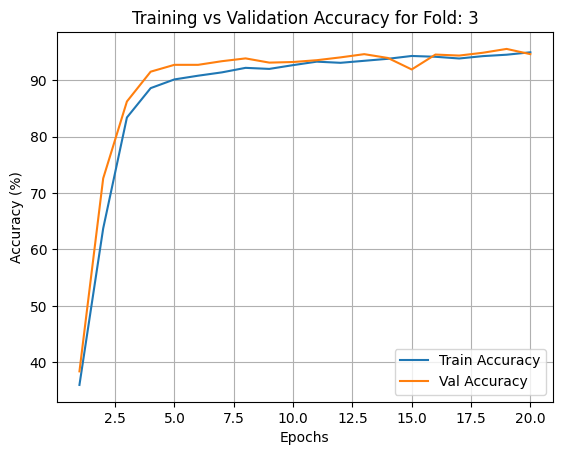

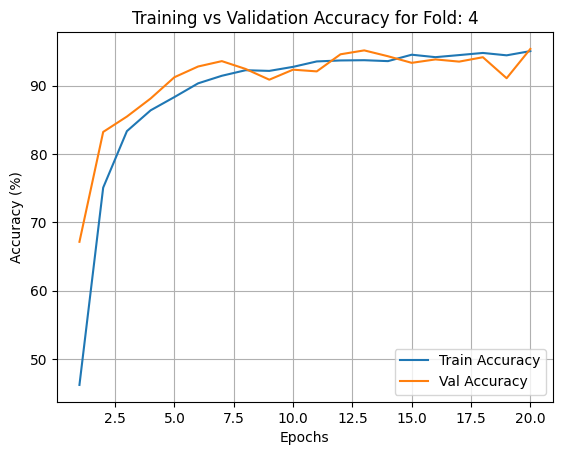

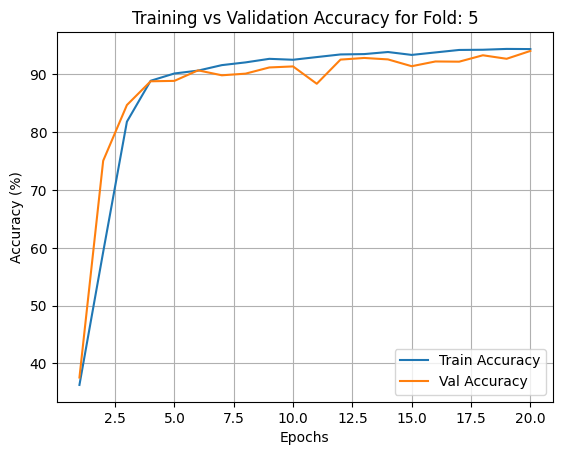

In [ ]:
for i in range(len(train_accuracies)):
  # plt.figure(figsize=(8, 5))
  plt.plot(range(1, num_epochs + 1), train_accuracies[i], label="Train Accuracy")
  plt.plot(range(1, num_epochs + 1), val_accuracies[i], label="Val Accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy (%)")
  plt.title(f"Training vs Validation Accuracy for Fold: {i+1}")
  plt.legend()
  plt.grid()
  plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Evaluating Model on Test Set
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)

        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())



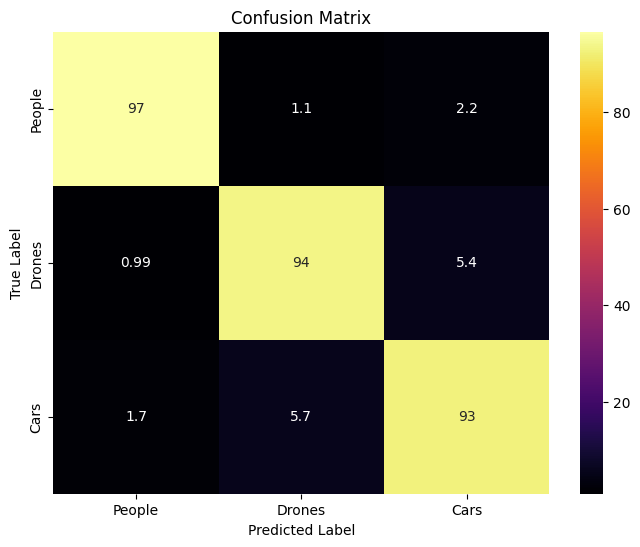

In [ ]:
# Computing Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1, keepdims=True) * 100
np.set_printoptions(suppress=True)
class_names = np.unique(y_true)  # Get class names from labels

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=True, cmap="inferno", xticklabels=target_v.keys(), yticklabels=target_v.keys())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print Classification Report
# print("Classification Report:\n", classification_report(y_true, y_pred)